# **NOTEBOOK FOR TRAINING CUSTOM OBJECT DETECTION ON GOOGLE COLAB**

# **1.0 Confirm your present directory**

In [20]:
ls

models/  sample_data/


In [19]:
cd ..

/content


# **2.0 Installing Tensorflow**

In [2]:
#check whether it has already been installed
!pip show tensorflow

Name: tensorflow
Version: 2.3.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.6/dist-packages
Requires: gast, wheel, scipy, keras-preprocessing, h5py, six, protobuf, google-pasta, wrapt, termcolor, numpy, tensorflow-estimator, grpcio, opt-einsum, tensorboard, absl-py, astunparse
Required-by: fancyimpute


In [3]:
# if not installed
# pip install tensorflow == 2.3.0
#if the above version gives you problem
# pip install tensorflow == 2.0

# **3.0 Importing the relevant modules**

In [4]:
pip install pillow Cython lxml jupyter matplotlib tf_slim

     |████████████████████████████████| 358kB 2.7MB/s 


# **4.0 Installing Other Python Packages**

In [5]:
import os                          # Operating system level activities
import numpy as np                 # Mathematical operation
import matplotlib.pyplot as plt    # Chart visualisation
import matplotlib.image as mpimg   # Image  display
import tensorflow as tf            # machine & deep learning framework
import pathlib                     # File path
from PIL import Image              #Pillow - image   handling

%matplotlib inline  
%pylab inline    
   # Display charts within jupyter notebook
   # Display charts within jupyter notebook

Populating the interactive namespace from numpy and matplotlib


# **5.0 Download Tensowflow Repository**

## **5.1 Download the models folder**

In [6]:
!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 45207, done.
remote: Total 45207 (delta 0), reused 0 (delta 0), pack-reused 45207
Receiving objects: 100% (45207/45207), 550.76 MiB | 14.75 MiB/s, done.
Resolving deltas: 100% (30931/30931), done.


In [22]:
# check the contents of the model directory

In [23]:
ls models/

AUTHORS     community/       ISSUES.md  official/  README.md
CODEOWNERS  CONTRIBUTING.md  LICENSE    orbit/     research/


## **5.2 Remove unnecessary folders in the models directory**

In [24]:
rm -r models/AUTHORS

In [25]:
rm -r models/*.md

In [26]:
rm -r models/CODEOWNERS

In [27]:
rm -r models/LICENSE 

In [30]:
#Re-check the contents of the model directory

In [31]:
ls models

community/  official/  orbit/  research/


# **6.0 Set up the environment**

## **6.1 Switch to research folder**

In [32]:
cd models/research

/content/models/research


## **6.2 Protoc**
Protocol buffers are a language-neutral, platform-neutral extensible mechanism for serializing structured data. The Tensorflow Object Detection API uses Protobufs to configure model and training parameters. Before the framework can be used, the Protobuf libraries must be downloaded and compiled.

In [33]:
# This only works on linux system
!protoc object_detection/protos/*.proto --python_out=.

If it is not installed take actions below.

In [34]:
#!apt-get update
#! apt install protobuf-compiler

## **6.3 Install the Tensorflow Object Detection API**
The API is capable of creating accurate model of localising and identifying multiple objects in a sing image or video.

In [35]:
!python -m pip install .

Processing /content/models/research
  Created wheel for object-detection: filename=object_detection-0.1-cp36-none-any.whl size=1348656 sha256=16dfb2af1e1dcda83e5ad5a48470f0155927796355c7398c758576494bdef34b
  Stored in directory: /tmp/pip-ephem-wheel-cache-hct22n_s/wheels/94/49/4b/39b051683087a22ef7e80ec52152a27249d1a644ccf4e442ea
Successfully built object-detection


If it is not in the folder research folder, follow the instruction below to copy it.

In [36]:
#cp object_detection/packages/tf2/setup.py .

# **7.0 Testing of installation**

In [37]:
cp object_detection/builders/model_builder_tf2_test.py .

In [38]:
#Copy the folder into dist-packages 
!cp -r /content/models/official  /usr/local/lib/python3.6/dist-packages

In [39]:
!python object_detection/builders/model_builder_tf2_test.py

2020-10-01 09:28:47.128812: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Running tests under Python 3.6.9: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_model
2020-10-01 09:28:49.430095: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-10-01 09:28:49.473523: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-10-01 09:28:49.474186: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2020-10-01 09:28:49.474233: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] 

If you come across this error "ModuleNotFoundError: No module named 'official'"

# **8.0 Custom Object Detection**

## **8.1 Switch to default folder**

In [40]:
cd /content/

/content


In [44]:
ls 

models/  sample_data/


## **8.2 Upload the workspace folder documents**

In [45]:
#Upload custom image
# Remove the hash sign to upload your image
#from google.colab import files
#uploaded = files.upload()

In [46]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [47]:
ls

drive/  models/  sample_data/


In [53]:
cd ..

/content


In [56]:
!cp /content/drive/'My Drive'/workspace.zip .

## **8.3 Use below code to unzip files (if necessary)**

In [57]:
# Extracting the files
import zipfile
path_to_zip_file = 'workspace.zip'
directory_to_extract_to =''
zip_ref = zipfile.ZipFile(path_to_zip_file, 'r')
zip_ref.extractall(directory_to_extract_to)
zip_ref.close() 

## **8.4 Use below code to remove zip files (if necessary)**

In [58]:
### remove the zip file
!rm workspace.zip

## **8.5 Model Training**

### **8.5.1 Switch to the training_model folder**

In [59]:
ls

drive/  models/  sample_data/  workspace/


In [61]:
cd /content/workspace/training_demo/

/content/workspace/training_demo


In [62]:
ls

annotations/  exported-models/  images/  models/  pre-trained-models/


### **8.5.2 Copy model_main_tf2.py into training_demo folder**

In [63]:
!find / -type f -name "model_main_tf2.py"

/usr/local/lib/python3.6/dist-packages/object_detection/model_main_tf2.py
/content/models/research/object_detection/model_main_tf2.py


In [64]:
!cp /content/models/research/object_detection/model_main_tf2.py .

### **8.5.3 Check memory availability**

In [65]:
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm()

  Created wheel for gputil: filename=GPUtil-1.4.0-cp36-none-any.whl size=7411 sha256=dc0d75d8d9b6cad52ae2c1cf69e3f310b19a01ad1d1f1376ef9279dd47ae358b
  Stored in directory: /root/.cache/pip/wheels/3d/77/07/80562de4bb0786e5ea186911a2c831fdd0018bda69beab71fd
Successfully built gputil
Gen RAM Free: 12.6 GB  | Proc size: 400.8 MB
GPU RAM Free: 16280MB | Used: 0MB | Util   0% | Total 16280MB


In [ ]:
a = []
while(1):
    a.append('1')

In [1]:
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm()

Gen RAM Free: 12.8 GB  | Proc size: 111.6 MB
GPU RAM Free: 16280MB | Used: 0MB | Util   0% | Total 16280MB


In [3]:
cd /content/workspace/training_demo/

/content/workspace/training_demo


In [4]:
ls

annotations/      images/            models/
exported-models/  model_main_tf2.py  pre-trained-models/


### **8.5.4 Copy and paste model_main_tf2.py**

In [5]:
cd /content/workspace/training_demo/

/content/workspace/training_demo


In [11]:
cp /content/models/research/object_detection/model_main_tf2.py .

In [12]:
cp -r /content/models/official  /usr/local/lib/python3.6/dist-packages

### **8.5.5 Run the Model**

Make sure you run it from the training folder

In [13]:
ls

annotations/      images/            models/
exported-models/  model_main_tf2.py  pre-trained-models/


In [17]:
!python model_main_tf2.py --model_dir=models/my_ssd_resnet50_v1_fpn --pipeline_config_path=models/my_ssd_resnet50_v1_fpn/pipeline.config

2020-10-01 16:22:04.268390: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-10-01 16:22:08.504289: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-10-01 16:22:08.523855: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-10-01 16:22:08.524420: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2020-10-01 16:22:08.524463: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-10-01 16:22:08.539778: I tensorflow/stream_executor/pl

In [ ]:
#!find / -type f -name "exporter_main_v2.py"

## **8.6 Export the model**

In [18]:
ls models/my_ssd_resnet50_v1_fpn

checkpoint                   ckpt-18.data-00000-of-00001
ckpt-14.data-00000-of-00001  ckpt-18.index
ckpt-14.index                ckpt-19.data-00000-of-00001
ckpt-15.data-00000-of-00001  ckpt-19.index
ckpt-15.index                ckpt-20.data-00000-of-00001
ckpt-16.data-00000-of-00001  ckpt-20.index
ckpt-16.index                pipeline.config
ckpt-17.data-00000-of-00001  train/
ckpt-17.index


In [21]:
ls

annotations/      exporter_main_v2.py  model_main_tf2.py  pre-trained-models/
exported-models/  images/              models/


In [20]:
cp /content/models/research/object_detection/exporter_main_v2.py .

In [22]:
!python exporter_main_v2.py input_type image_tensor --pipeline_config_path models/my_ssd_resnet50_v1_fpn/pipeline.config --trained_checkpoint_dir models/my_ssd_resnet50_v1_fpn/ --output_directory exported-models/my_model

2020-10-01 16:26:39.514765: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-10-01 16:26:41.411974: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-10-01 16:26:41.425264: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-10-01 16:26:41.425847: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2020-10-01 16:26:41.425891: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-10-01 16:26:41.431766: I tensorflow/stream_executor/pl

In [23]:
ls models/my_ssd_resnet50_v1_fpn

checkpoint                   ckpt-18.data-00000-of-00001
ckpt-14.data-00000-of-00001  ckpt-18.index
ckpt-14.index                ckpt-19.data-00000-of-00001
ckpt-15.data-00000-of-00001  ckpt-19.index
ckpt-15.index                ckpt-20.data-00000-of-00001
ckpt-16.data-00000-of-00001  ckpt-20.index
ckpt-16.index                pipeline.config
ckpt-17.data-00000-of-00001  train/
ckpt-17.index


## **8.7 Apply the Built Model**

In [24]:
import io
import os
import scipy.misc
import numpy as np
import six
import time
import glob
from IPython.display import display

from six import BytesIO

import matplotlib
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

import tensorflow as tf
from object_detection.utils import ops as utils_ops
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

%matplotlib inline

In [25]:
def load_image_into_numpy_array(path):
  img_data = tf.io.gfile.GFile(path, 'rb').read()
  image = Image.open(BytesIO(img_data))
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

In [26]:
labelmap_path = 'annotations/label_map.pbtxt'

In [27]:
category_index = label_map_util.create_category_index_from_labelmap(labelmap_path, use_display_name=True)

In [28]:
tf.keras.backend.clear_session()
model = tf.saved_model.load('exported-models/my_model/saved_model')

In [29]:
ls exported-models/my_model/saved_model

assets/  saved_model.pb  variables/


In [31]:
def run_inference_for_single_image(model, image):
  image = np.asarray(image)
  # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
  input_tensor = tf.convert_to_tensor(image)
  # The model expects a batch of images, so add an axis with `tf.newaxis`.
  input_tensor = input_tensor[tf.newaxis,...]

  # Run inference
  model_fn = model.signatures['serving_default']
  output_dict = model_fn(input_tensor)

  # All outputs are batches tensors.
  # Convert to numpy arrays, and take index [0] to remove the batch dimension.
  # We're only interested in the first num_detections.
  num_detections = int(output_dict.pop('num_detections'))
  output_dict = {key:value[0, :num_detections].numpy() 
                 for key,value in output_dict.items()}
  output_dict['num_detections'] = num_detections

  # detection_classes should be ints.
  output_dict['detection_classes'] = output_dict['detection_classes'].astype(np.int64)
   
  # Handle models with masks:
  if 'detection_masks' in output_dict:
    # Reframe the the bbox mask to the image size.
    detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
              output_dict['detection_masks'], output_dict['detection_boxes'],
               image.shape[0], image.shape[1])      
    detection_masks_reframed = tf.cast(detection_masks_reframed > 0.5,
                                       tf.uint8)
    output_dict['detection_masks_reframed'] = detection_masks_reframed.numpy()
    
  return output_dict

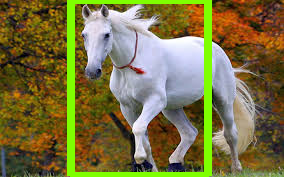

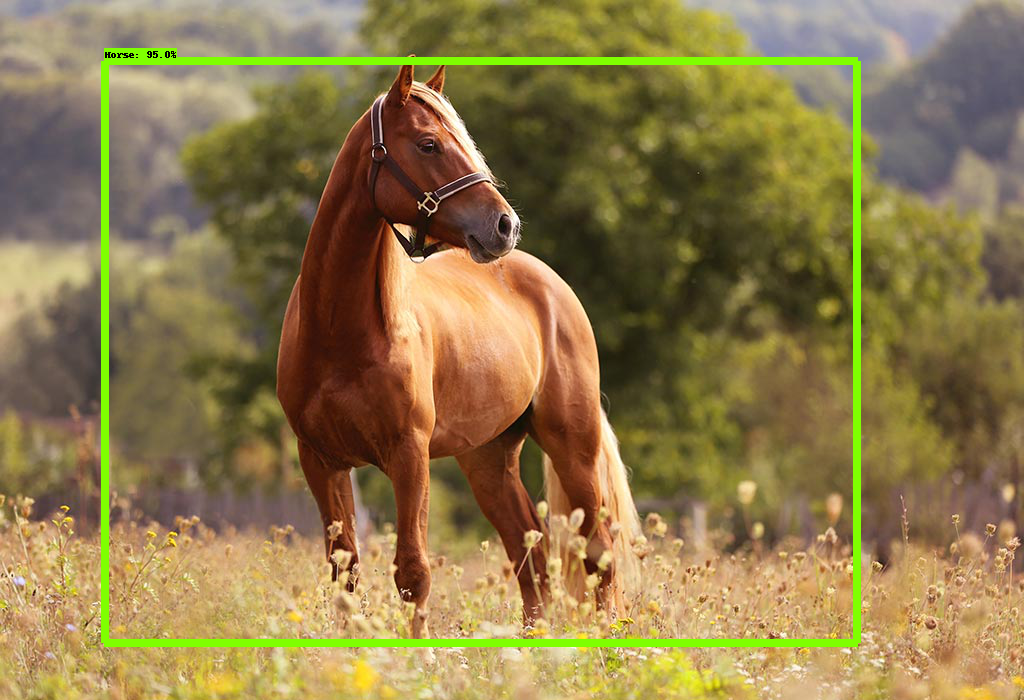

In [32]:
%matplotlib inline
for image_path in glob.glob('images/test/*.jpg'):
  image_np = load_image_into_numpy_array(image_path)
  output_dict = run_inference_for_single_image(model, image_np)
  vis_util.visualize_boxes_and_labels_on_image_array(
      image_np,
      output_dict['detection_boxes'],
      output_dict['detection_classes'],
      output_dict['detection_scores'],
      category_index,
      instance_masks=output_dict.get('detection_masks_reframed', None),
      use_normalized_coordinates=True,
      line_thickness=8)
  display(Image.fromarray(image_np))

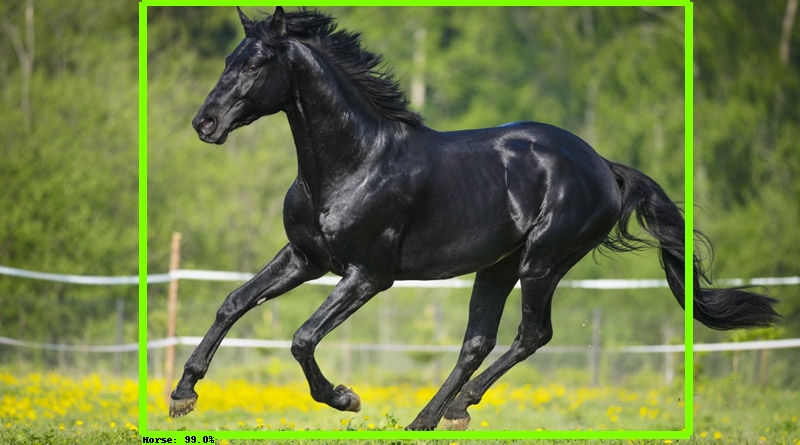

In [ ]:
%matplotlib inline
for image_path in glob.glob('images/train/*.jpg'):
  image_np = load_image_into_numpy_array(image_path)
  output_dict = run_inference_for_single_image(model, image_np)
  vis_util.visualize_boxes_and_labels_on_image_array(
      image_np,
      output_dict['detection_boxes'],
      output_dict['detection_classes'],
      output_dict['detection_scores'],
      category_index,
      instance_masks=output_dict.get('detection_masks_reframed', None),
      use_normalized_coordinates=True,
      line_thickness=8)
  display(Image.fromarray(image_np))